In [4]:
import random
from queue import PriorityQueue
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# ******************************************************************************
# Constants
# ******************************************************************************

ARRIVAL = 5.0  # Average inter-arrival time => lambda = 1/5 = 0.2
SIM_TIME = 500000
SERVICE_TIMES = [1.0, 1.2, 1.3, 1.5, 2.0, 2.3, 2.5, 2.7, 3.0, 3.3, 3.5,3.7, 4.0,4.3, 4.5, 4.7, 5.0, 5.3, 5.5, 5,7, 6.0,6,3,6.5,6.7, 7.0,7.3,7.5,7.7, 8.0,8.3,8.5,8.7,9.0, 9.3,9.5,9.7, 10.0]  # Service time values for varying μ
TYPE1 = 1

In [6]:
# ******************************************************************************
# Class Definitions
# ******************************************************************************

class Measure:
    def __init__(self, Narr, Ndep, NAveraegUser, OldTimeEvent, AverageDelay):
        self.arr = Narr
        self.dep = Ndep
        self.ut = NAveraegUser
        self.oldT = OldTimeEvent
        self.delay = AverageDelay



In [7]:
class Client:
    def __init__(self, type, arrival_time):
        self.type = type
        self.arrival_time = arrival_time

In [23]:
# ******************************************************************************
# Simulation Function
# ******************************************************************************

def simulate_mm1(service_time):
    global users, data, MM1
    users = 0
    data = Measure(0, 0, 0, 0, 0)
    MM1 = []
    FES = PriorityQueue()
    time = 0.0
    busy_time = 0.0

    def arrival(current_time):
        nonlocal busy_time
        global users
        data.arr += 1
        data.ut += users * (current_time - data.oldT)
        data.oldT = current_time
        inter_arrival = random.expovariate(1.0 / ARRIVAL)
        FES.put((current_time + inter_arrival, "arrival"))
        users += 1
        client = Client(TYPE1, current_time)
        MM1.append(client)
        if users == 1:
            duration = random.expovariate(1.0 / service_time)
            busy_time += service_time
            FES.put((current_time + duration, "departure"))

    def departure(current_time):
        nonlocal busy_time
        global users
        data.dep += 1
        data.ut += users * (current_time - data.oldT)
        data.oldT = current_time
        client = MM1.pop(0)
        data.delay += current_time - client.arrival_time
        users -= 1
        if users > 0:
            
            duration = random.expovariate(1.0 / service_time)
            busy_time += service_time
            FES.put((current_time + duration, "departure"))

    FES.put((0.0, "arrival"))
    while time < SIM_TIME:
        time, event_type = FES.get()
        if event_type == "arrival":
            arrival(time)
        elif event_type == "departure":
            departure(time)

    avg_delay = data.delay / data.dep if data.dep > 0 else 0
    avg_users = data.ut / time
    # utilization = data.ut / time  
    utilization = busy_time/ SIM_TIME
    

    return {
        "Service Time": service_time,
        "μ (Service Rate)": round(1.0 / service_time, 4),
        "Average Delay": avg_delay,
        "Average Users": avg_users,
        "Utilization": utilization
    }


In [17]:
# ******************************************************************************
# Run Simulations
# ******************************************************************************

results = []
for s_time in SERVICE_TIMES:
    res = simulate_mm1(s_time)
    results.append(res)

df = pd.DataFrame(results)
df.sort_values("μ (Service Rate)", inplace=True)

print(df)

    Service Time  μ (Service Rate)  Average Delay  Average Users  Utilization
38          10.0            0.1000  125715.525604       0.993139     0.993140
37           9.7            0.1031  121511.268185       0.995462     0.995472
36           9.5            0.1053  115618.257088       1.006362     1.006373
35           9.3            0.1075  115692.694983       1.000500     1.000513
34           9.0            0.1111  111066.798663       0.995172     0.995184
33           8.7            0.1149  105826.547269       1.000486     1.000500
32           8.5            0.1176  102903.074883       0.996149     0.996149
31           8.3            0.1205   99286.893163       1.001519     1.001528
30           8.0            0.1250   96461.489819       0.997314     0.997328
29           7.7            0.1299   87102.942940       1.005416     1.005420
28           7.5            0.1333   82378.360843       1.004530     1.004535
27           7.3            0.1370   78729.521752       0.997349

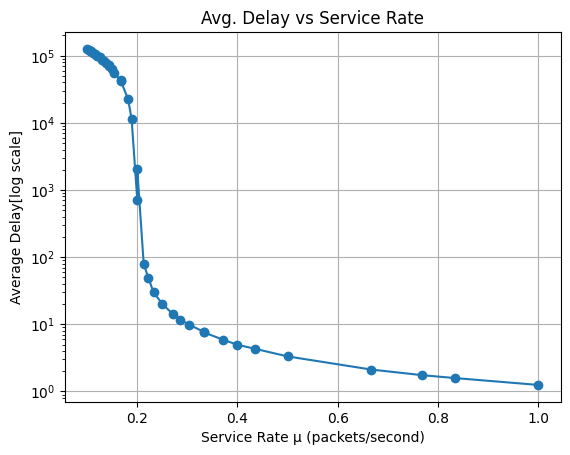

In [19]:
plt.figure()

plt.plot(df["μ (Service Rate)"], df["Average Delay"], marker='o')
plt.xlabel("Service Rate μ (packets/second)")
# plt.ylabel("Average Delay")
plt.yscale("log")

plt.ylabel("Average Delay[log scale]")

plt.title("Avg. Delay vs Service Rate")
plt.grid(True)
plt.show()


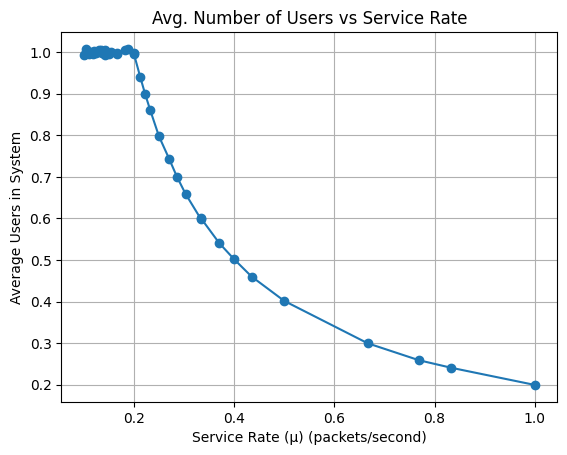

In [22]:
plt.figure()
plt.plot(df["μ (Service Rate)"], df["Average Users"], marker='o')
plt.xlabel("Service Rate (μ) (packets/second)")
plt.ylabel("Average Users in System")
plt.title("Avg. Number of Users vs Service Rate")
plt.grid(True)
plt.show()

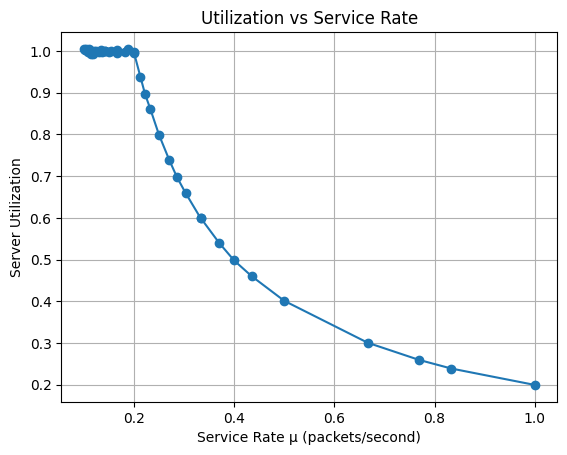

In [78]:
plt.figure()
plt.plot(df["μ (Service Rate)"], df["Utilization"], marker='o')
plt.xlabel("Service Rate μ (packets/second)")
plt.ylabel("Server Utilization")
plt.title("Utilization vs Service Rate")
plt.grid(True)
plt.show()
